<a href="https://colab.research.google.com/github/YongwoonHwang/Class/blob/main/The_new_titanic_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/train.csv')

In [3]:
train = train[['Survived', 'Pclass', 'Age', 'Sex', 'Fare', 'Embarked']]
train

,Survived,Pclass,Age,Sex,Fare,Embarked
0,0,3,22.0,male,7.2500,S
1,1,1,38.0,female,71.2833,C
2,1,3,26.0,female,7.9250,S
3,1,1,35.0,female,53.1000,S
4,0,3,35.0,male,8.0500,S
...,...,...,...,...,...,...
886,0,2,27.0,male,13.0000,S
887,1,1,19.0,female,30.0000,S
888,0,3,NaN,female,23.4500,S
889,1,1,26.0,male,30.0000,C


In [4]:
train['Embarked'] = train['Embarked'].replace(('S', 'Q', 'C'), (2, 3, 1))
train['Sex'] = train['Sex'].replace(('female', 'male'), (1, 0))
train.loc[train ['Age'] < 2.0, 'Age'] = 6 #inf
train.loc[(train ['Age'] >= 2.0) & (train['Age'] < 12.0), 'Age'] = 5 #child
train.loc[(train['Age'] >= 12.0) & (train['Age'] < 19.0), 'Age'] = 4 #teen
train.loc[(train['Age'] >= 19.0) & (train['Age'] < 30.0), 'Age'] = 3 #parent
train.loc[(train['Age'] >= 30.0) & (train['Age'] < 50.0), 'Age'] = 2 #adult
train.loc[(train['Age'] >= 50.0) & (train['Age'] < 65.0), 'Age'] = 1 #elder1
train.loc[train['Age'] >= 65.0, 'Age'] = 0 #elder2
train.loc[train ['Fare'] <= 7.75,'Fare'] = 4
train.loc[(train['Fare'] > 7.75) & (train['Fare'] <= 13.00), 'Fare'] =  3
train.loc[(train ['Fare'] > 13.00) & (train ['Fare'] <= 29.7), 'Fare'] = 2
train.loc[(train ['Fare'] > 29.7) & (train ['Fare'] <= 60), 'Fare'] = 1
train.loc[train ['Fare'] > 60, 'Fare'] = 0
train['Fare'] = train['Fare'].astype(int)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Sex       891 non-null    int64  
 4   Fare      891 non-null    int64  
 5   Embarked  889 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [6]:
train = train.fillna(train.mean())

In [7]:
train

,Survived,Pclass,Age,Sex,Fare,Embarked
0,0,3,3.000000,0,4,2.0
1,1,1,2.000000,1,0,1.0
2,1,3,3.000000,1,3,2.0
3,1,1,2.000000,1,1,2.0
4,0,3,2.000000,0,3,2.0
...,...,...,...,...,...,...
886,0,2,3.000000,0,3,2.0
887,1,1,3.000000,1,1,2.0
888,0,3,2.708683,1,2,2.0
889,1,1,3.000000,0,1,1.0


In [8]:
data = train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].to_numpy()
target = train['Survived'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2
)

In [10]:
print(train_input.shape, test_input.shape)

(712, 5) (179, 5)


In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.800561797752809
0.7597765363128491


In [13]:
print(lr.coef_, lr.intercept_)

[[-0.96961422  1.29601191  0.37579678  0.08667884 -0.08726779]] [-0.69632461]


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8721910112359551
0.8156424581005587


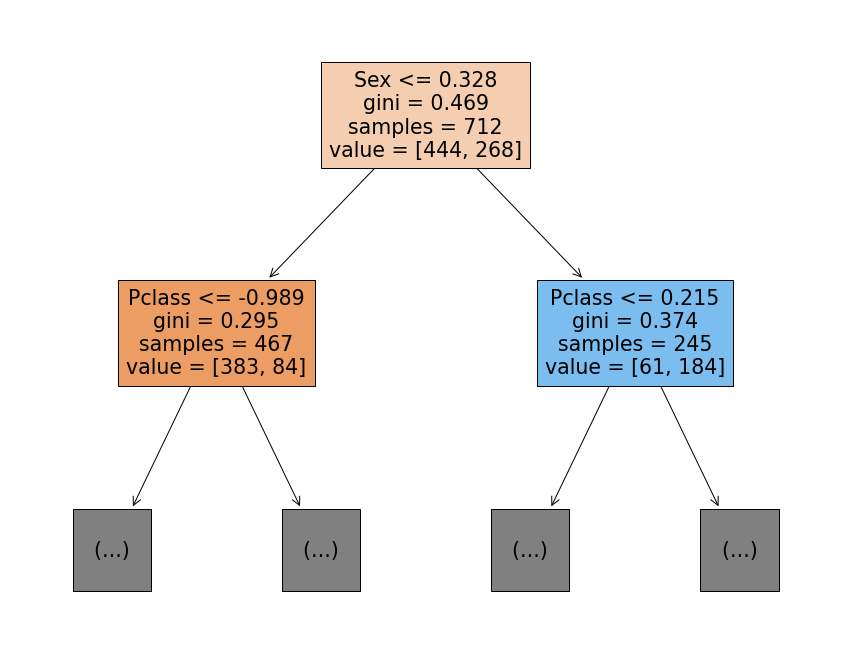

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'])
plt.show()

In [16]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8103932584269663
0.776536312849162


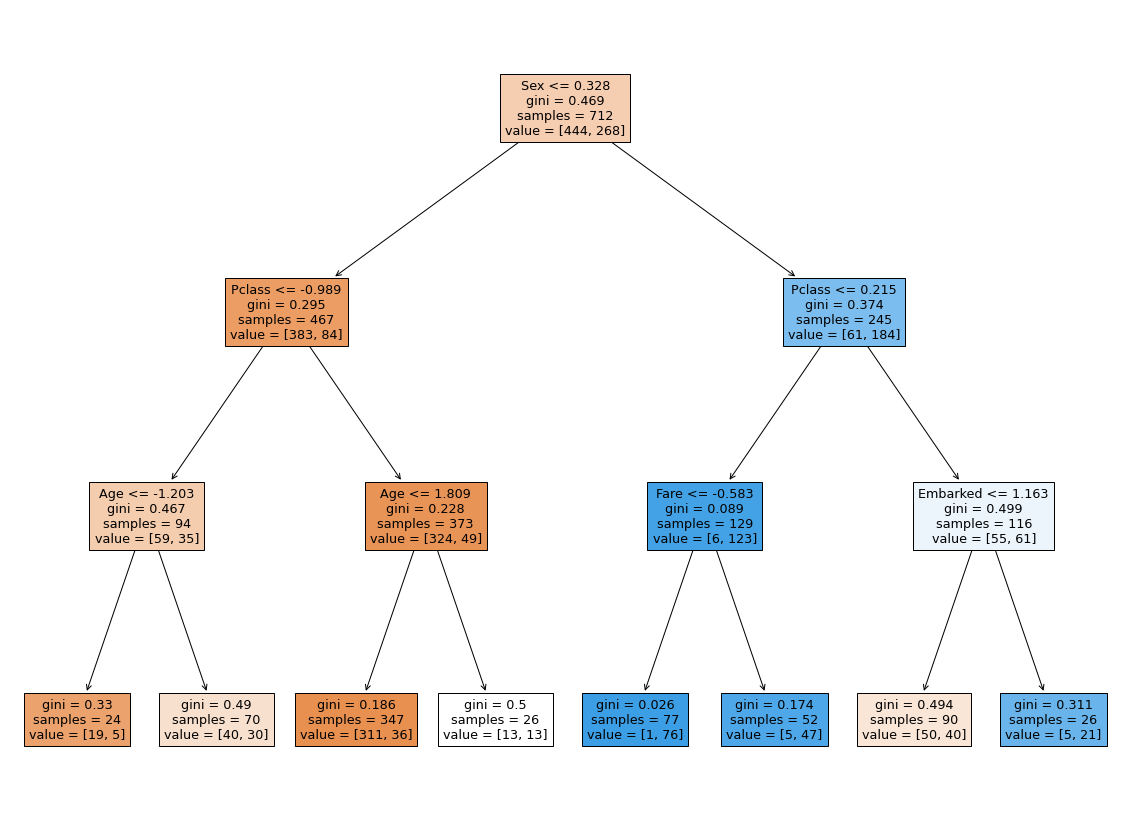

In [17]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled = True, feature_names=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'])
plt.show()

0.8539325842696629
0.8044692737430168


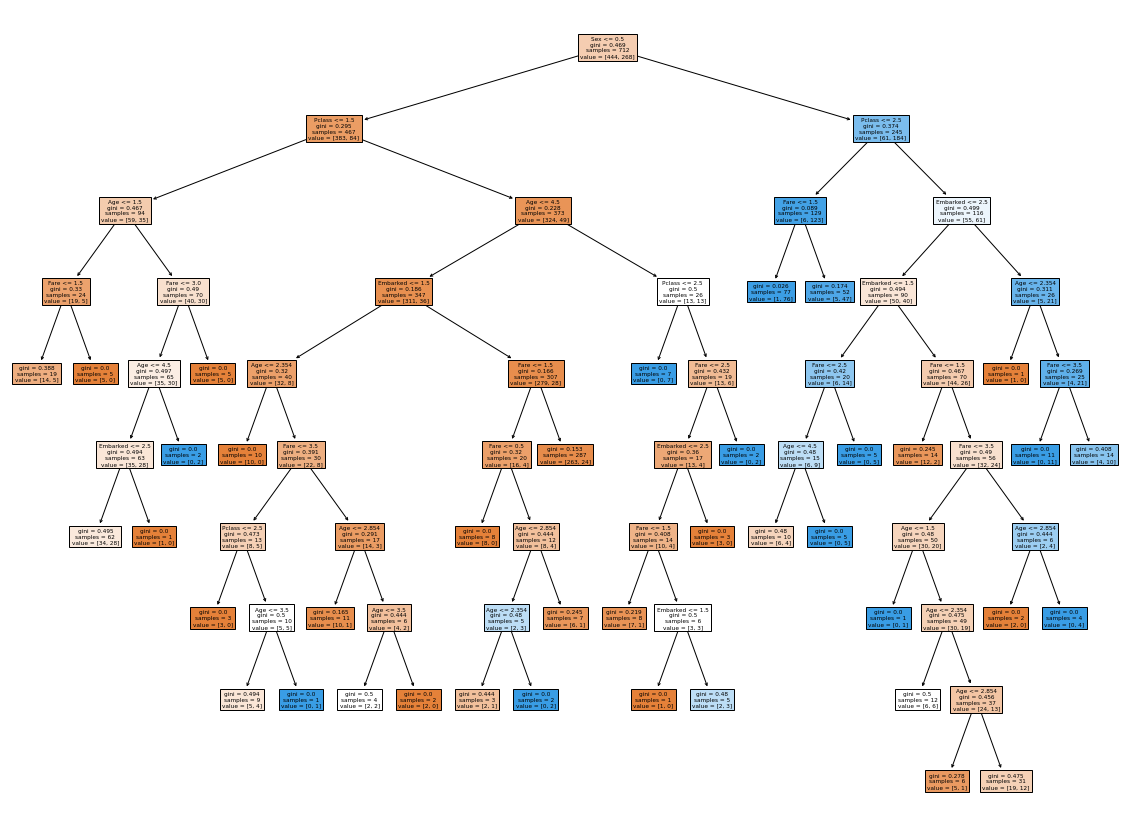

In [18]:
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
data = train [['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].to_numpy()
target = train['Survived'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2
)


In [21]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

In [22]:
scores = cross_validate(rf, train_input, train_target,
                        return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8809681497240465 0.8174332709543977


In [23]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.1653181  0.39607696 0.20905602 0.15489648 0.07465244]


In [24]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8216292134831461


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8809681497240465 0.8187826258248794


In [26]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.18157363 0.4313022  0.20115374 0.12761685 0.05835358]


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8560349027225357 0.8272431793558555


In [28]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8799142848333487 0.8243967300305328


In [29]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.22764124 0.50258207 0.12224513 0.09650832 0.05102324]


In [30]:
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8609539666389171 0.8229981286319316


In [31]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                                n_repeats=10, n_jobs=-1)
print(result.importances_mean)

[0.15337079 0.19030899 0.09789326 0.06530899 0.03581461]


In [32]:
result = permutation_importance(hgb, test_input, test_target,
                                n_repeats=10, n_jobs=-1)
print(result.importances_mean)
print(result.importances)
print(result.importances_std)

[0.14078212 0.16592179 0.04581006 0.05921788 0.03407821]
[[0.15642458 0.1452514  0.10614525 0.15083799 0.10055866 0.13407821
  0.15083799 0.20670391 0.12849162 0.12849162]
 [0.17318436 0.18435754 0.1452514  0.18994413 0.18435754 0.15083799
  0.16201117 0.1452514  0.16759777 0.15642458]
 [0.06703911 0.05027933 0.06145251 0.06145251 0.05027933 0.03910615
  0.04469274 0.01117318 0.03351955 0.03910615]
 [0.05027933 0.05586592 0.05586592 0.04469274 0.0726257  0.0726257
  0.06145251 0.08938547 0.03351955 0.05586592]
 [0.02793296 0.03351955 0.03351955 0.02793296 0.03351955 0.01675978
  0.02793296 0.03910615 0.04469274 0.05586592]]
[0.02824408 0.01581114 0.01556245 0.01503198 0.01013316]


In [33]:
hgb.score(test_input, test_target)

0.8268156424581006

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8486646317022786 0.8243967300305328


In [35]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
scores = cross_validate(lgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

In [36]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8630616964203128 0.8229981286319313
